# Estudo sobre a evolução do virus Covid-19 (CORONAVÍRUS)

> [Autor](https://www.linkedin.com/in/alberto-oliveira-barbosa/)

# Fontes dos dados
> [Repositório Johns Hopkins CSSE](https://github.com/CSSEGISandData/COVID-19)  
> [Daily reports](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports)  
> [Time Series](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series)


# Avisos

- Os dados das fontes são atualizados no final do dia, por isso dependendo do horário que o notebook for usado, ele pode ou não, conter os dados mais atuais do repositório.  
- Como os dados foram disponibilizados na internet de forma **pública**, o autor não se responsabiliza pela manutenção dos repositórios com os dados nem a exatidão deles com outras fontes, sendo estas, oficiais ou não.  
- Este é um projeto desenvolvido para **fins de estudo**, e tal qual, não tem por objetivo servir de guia ou referência oficial sobre o caso.

# Import de bibliotecas e configurações do notebook

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
# configuração global dos gráficos
plt.rcParams['figure.figsize'] = (11,6)

# Funções:

In [2]:
# Verifica se a ultima data é válida
# caso o campo de data esteja em branco, ele pega a coluna anterior a ela

def valida_dados(dados, tipo_dataset):
    
    coluna = -1
    data_atualizada = dados.columns[coluna]

    while (dados[data_atualizada].isna().mean() == 1):
        coluna = coluna - 1
        data_atualizada = dados.columns[coluna]

    print('\n', tipo_dataset)
    print('Ultima coluna do dataset: ', dados.columns[-1])
    print('Ultima data com valores válidos: ',data_atualizada)
    return data_atualizada

In [3]:
def plot_total_casos_pais(dados, pais, titulo=None, data_inicial = None, data_final = None):
    dados.groupby('Country/Region').sum().loc[pais][2:][data_inicial:data_final].plot()
    plt.title(titulo, fontsize=18)
    plt.xlabel('Data  (formato: MES/DIA/ANO)')
    plt.ylabel('Total de Casos')
    plt.show()

In [4]:
def plot_novos_casos_pais(dados, pais, titulo=None, data_inicial = None, data_final = None):
    dados.groupby('Country/Region').sum().loc[pais][2:][data_inicial:data_final].diff().plot()
    plt.title(titulo, fontsize=18)
    plt.xlabel('Data  (formato: MES/DIA/ANO)')
    plt.ylabel('Total de Casos')
    plt.show()

---

# Carga e validação dos dados

In [5]:
casos_confirmados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
mortes_confirmadas = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
casos_recuperados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [6]:
# valida os dados que serão usados nessa analise
data_atual_confirmados = valida_dados(casos_confirmados, 'Dataset de Casos Confirmados')
data_atual_mortes = valida_dados(mortes_confirmadas, 'Dataset de Mortes Confirmadas')
data_atual_recuperados = valida_dados(casos_recuperados, 'Dataset de Casos Recuperados')


 Dataset de Casos Confirmados
Ultima coluna do dataset:  3/18/20
Ultima data com valores válidos:  3/18/20

 Dataset de Mortes Confirmadas
Ultima coluna do dataset:  3/18/20
Ultima data com valores válidos:  3/18/20

 Dataset de Casos Recuperados
Ultima coluna do dataset:  3/18/20
Ultima data com valores válidos:  3/18/20


## Dados Sobre Casos Confirmados
### Descrições estatísticas e informações sobre os dados

In [7]:
# primeros registros
casos_confirmados.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,50,53,59,70,75,82,114,147,177,212
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,511,581,639,639,701,773,839,825,878,889
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,150,160,178,178,200,212,226,243,266,313
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,117,129,149,149,197,238,428,566,673,790


In [8]:
casos_confirmados.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,...,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,31.742141,-36.138645,1.201299,1.413420,2.036797,3.103896,4.584416,6.335498,12.073593,13.346320,...,245.803030,256.692641,272.435065,277.798701,314.270563,337.865801,362.437229,392.915584,426.714286,465.173160
std,18.815664,80.217674,20.708297,20.792959,25.900208,36.062942,50.412877,67.934111,166.507245,167.590443,...,3216.131465,3228.733859,3254.587449,3262.349350,3334.667826,3397.248691,3469.641132,3555.364285,3655.218904,3791.091715
min,-41.454500,-157.858400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.611300,-92.891550,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.831650,-74.304550,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,3.000000
75%,42.314500,20.989275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.000000,7.000000,10.000000,15.000000,20.500000,27.000000,33.750000,49.750000,63.500000,75.000000
max,71.706900,174.886000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,67743.000000,67760.000000,67773.000000,67781.000000,67786.000000,67790.000000,67794.000000,67798.000000,67799.000000,67800.000000


In [9]:
casos_confirmados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 61 columns):
Province/State    319 non-null object
Country/Region    462 non-null object
Lat               462 non-null float64
Long              462 non-null float64
1/22/20           462 non-null int64
1/23/20           462 non-null int64
1/24/20           462 non-null int64
1/25/20           462 non-null int64
1/26/20           462 non-null int64
1/27/20           462 non-null int64
1/28/20           462 non-null int64
1/29/20           462 non-null int64
1/30/20           462 non-null int64
1/31/20           462 non-null int64
2/1/20            462 non-null int64
2/2/20            462 non-null int64
2/3/20            462 non-null int64
2/4/20            462 non-null int64
2/5/20            462 non-null int64
2/6/20            462 non-null int64
2/7/20            462 non-null int64
2/8/20            462 non-null int64
2/9/20            462 non-null int64
2/10/20           462 non-null int64
2

In [10]:
casos_confirmados.shape

(462, 61)

In [11]:
# nome das colunas
casos_confirmados.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20'],
      dtype='object')

In [12]:
# Verifica a porcentagem de valores faltantes
casos_confirmados.isna().mean() * 100

Province/State    30.952381
Country/Region     0.000000
Lat                0.000000
Long               0.000000
1/22/20            0.000000
                    ...    
3/14/20            0.000000
3/15/20            0.000000
3/16/20            0.000000
3/17/20            0.000000
3/18/20            0.000000
Length: 61, dtype: float64

---

Podemos ver que o dataset é dividido em:  
- Province/State: Dados com a informação da provincia ou estado que foi confirmado o caso.
- Country/Region: País onde foi confirmado o caso.
- Lat: Dados de Latitude.
- Long: Dados de Longitude.
- Colunas com datas: Total Acumulado de casos em cada observação.


Os dados estão dispostos de modo que cada coluna após longitude representa uma data que foi contabilizado o acumulado dos casos.  
Como a coluna que representa os estados está com 30.95% de seus dados faltantes (até a data desta análise - 18/03/20) e cada país pode ou não especificar em que região o caso foi confirmado, ela não será considerada para a análise.

## Visualização de Gráficos

## Evolução de total de casos

In [13]:
# paises com casos
print('Total de países com casos confirmados de acordo com o dataset:',casos_confirmados['Country/Region'].nunique())
print('\nLista de países com casos confirmados de acordo com o dataset:\n',casos_confirmados['Country/Region'].unique())

Total de países com casos confirmados de acordo com o dataset: 152

Lista de países com casos confirmados de acordo com o dataset:
 ['Thailand' 'Japan' 'Singapore' 'Nepal' 'Malaysia' 'Canada' 'Australia'
 'Cambodia' 'Sri Lanka' 'Germany' 'Finland' 'United Arab Emirates'
 'Philippines' 'India' 'Italy' 'Sweden' 'Spain' 'Belgium' 'Egypt'
 'Lebanon' 'Iraq' 'Oman' 'Afghanistan' 'Bahrain' 'Kuwait' 'Algeria'
 'Croatia' 'Switzerland' 'Austria' 'Israel' 'Pakistan' 'Brazil' 'Georgia'
 'Greece' 'North Macedonia' 'Norway' 'Romania' 'Estonia' 'San Marino'
 'Belarus' 'Iceland' 'Lithuania' 'Mexico' 'New Zealand' 'Nigeria'
 'Ireland' 'Luxembourg' 'Monaco' 'Qatar' 'Ecuador' 'Azerbaijan' 'Armenia'
 'Dominican Republic' 'Indonesia' 'Portugal' 'Andorra' 'Latvia' 'Morocco'
 'Saudi Arabia' 'Senegal' 'Argentina' 'Chile' 'Jordan' 'Ukraine' 'Hungary'
 'Liechtenstein' 'Poland' 'Tunisia' 'Bosnia and Herzegovina' 'Slovenia'
 'South Africa' 'Bhutan' 'Cameroon' 'Colombia' 'Costa Rica' 'Peru'
 'Serbia' 'Slovakia' 'T

## Top 5 Países com mais casos confirmados

In [35]:
top5 = casos_confirmados.groupby('Country/Region')[data_atual_confirmados].sum().sort_values(ascending=False)[:5].index

print('Total de casos acumulados:\n\n',casos_confirmados.groupby('Country/Region')[data_atual_confirmados].sum().sort_values(ascending=False).head())

Total de casos acumulados:

 Country/Region
China      81102
Italy      35713
Iran       17361
Spain      13910
Germany    12327
Name: 3/18/20, dtype: int64


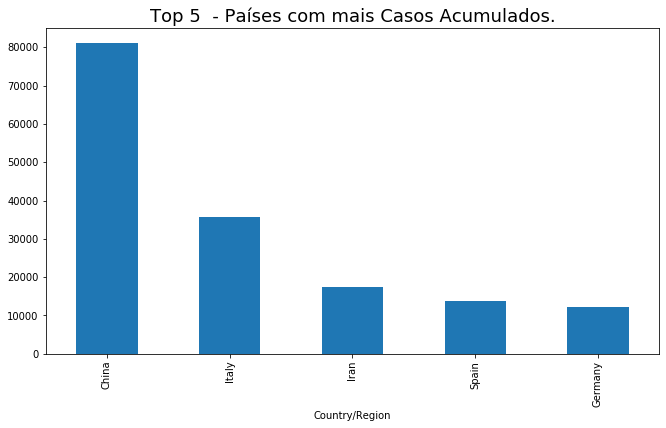

In [36]:
casos_confirmados.groupby('Country/Region')[data_atual_confirmados].sum().sort_values(ascending=False).head().plot(kind='bar')
plt.title('Top 5  - Países com mais Casos Acumulados.', fontsize=18)
plt.show()

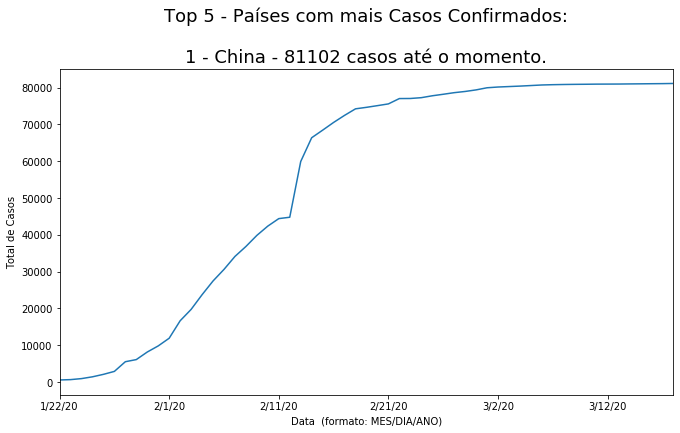

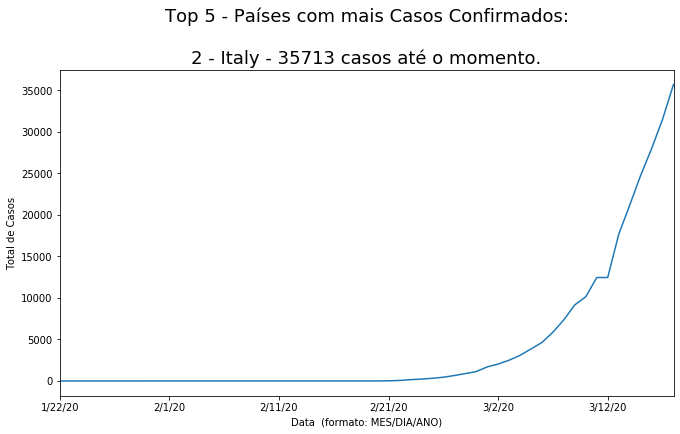

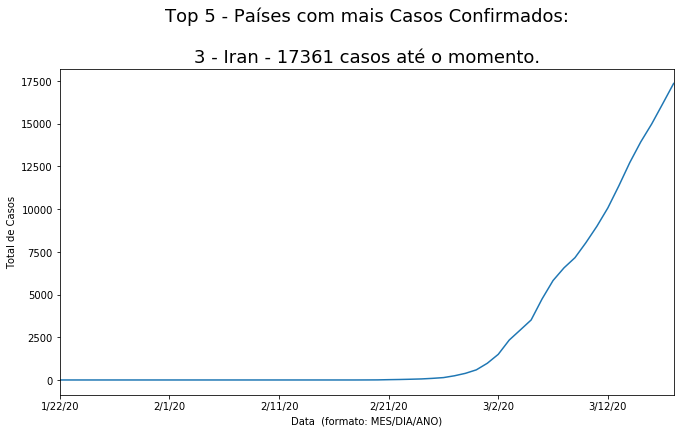

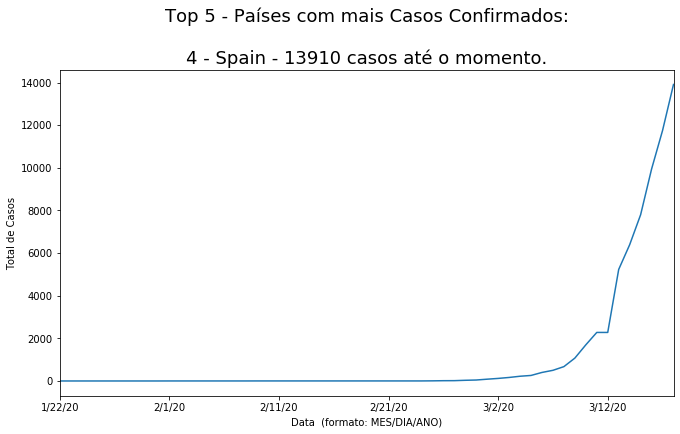

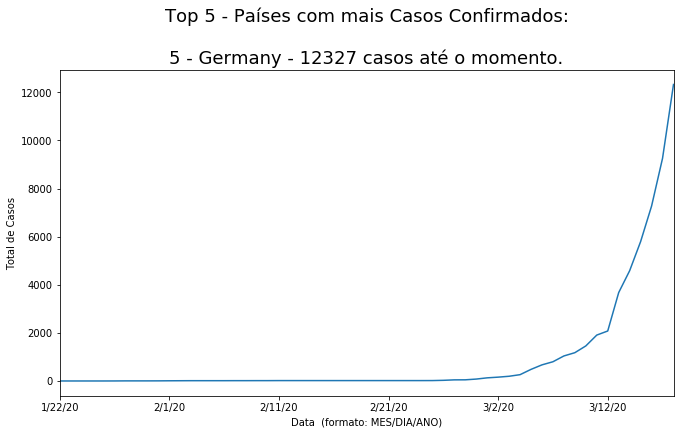

In [37]:
# Plota os graficos de cada país no top 10
for posicao, i in enumerate(top5):
    total = casos_confirmados.groupby('Country/Region')[data_atual_confirmados].sum().loc[i]
    plot_total_casos_pais(casos_confirmados, 
                          i,
                          'Top 5 - Países com mais Casos Confirmados:\n\n' 
                          + str(posicao+1) 
                          + ' - ' + str(i)
                          + ' - ' + str(total) + ' casos até o momento.',
                          data_final=data_atual_confirmados)


---


Como essa é uma visualização dos dados acumulados, ela pode não ser tão intuitiva para verificar a real proporção da propagação do virus, por esse motivo a proxima visão será de novos casos confirmados.

## Distribuição dos novos casos ao longo do tempo.

  Como o dataset nos proporciona uma visão acumulada dos dados, a regra utilizada para o calculo será a diferença entre a data posterior e a data anterior observada:
- Data posteriror - Data anterior = Quantidade de casos novos

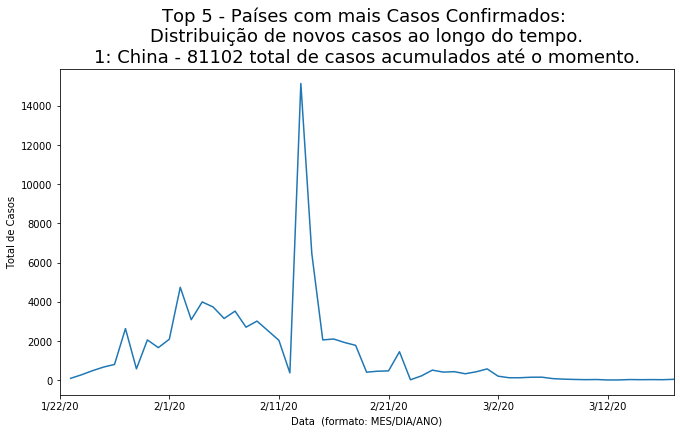

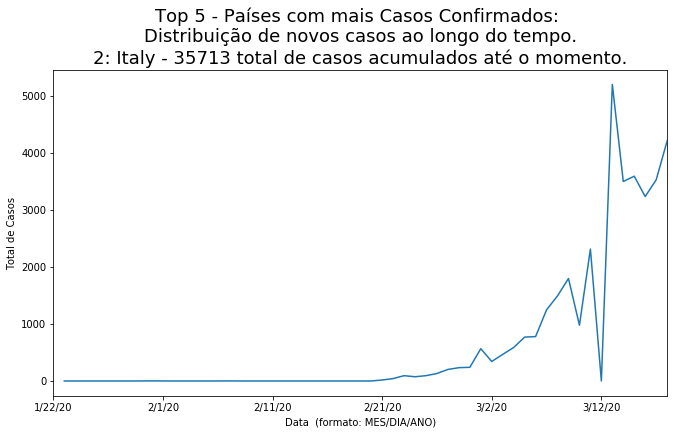

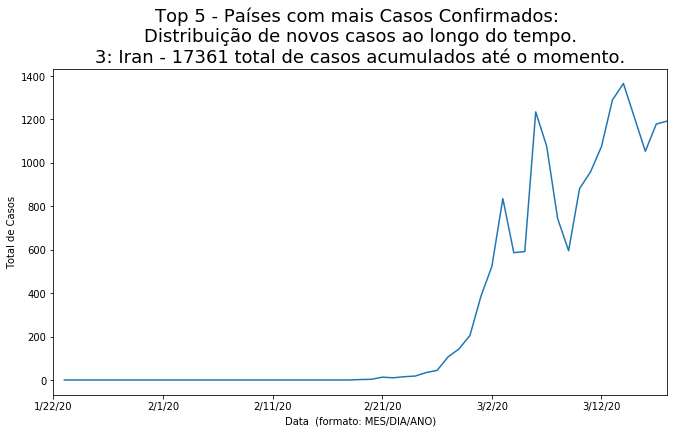

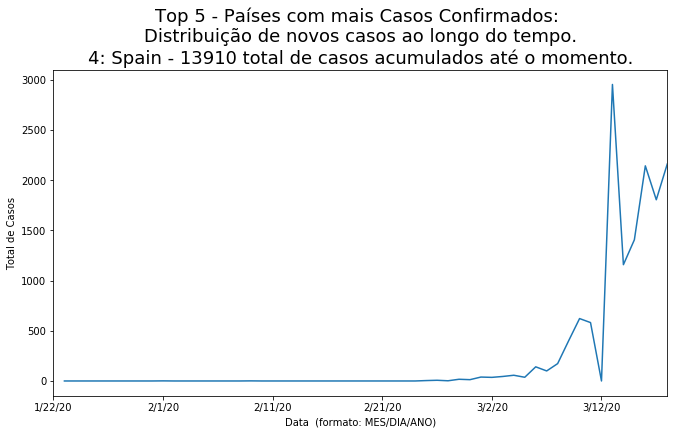

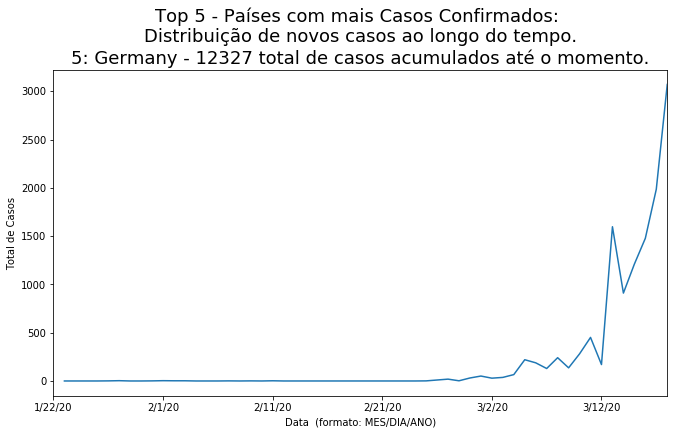

In [38]:
# Plota os graficos de cada país no top 5
for posicao, i in enumerate(top5):
    total = casos_confirmados.groupby('Country/Region')[data_atual_confirmados].sum().loc[i]
    plot_novos_casos_pais(casos_confirmados,
                          i,
                          'Top 5 - Países com mais Casos Confirmados: \nDistribuição de novos casos ao longo do tempo.\n' 
                          + str(posicao+1) 
                          + ': ' + str(i)
                          + ' - ' + str(total) + ' total de casos acumulados até o momento.',
                          data_final=data_atual_confirmados)


## Análise das Mortes

## Top 5 - Países com mais casos de mortes

In [39]:
top5_mortes = mortes_confirmadas.groupby('Country/Region')[data_atual_mortes].sum().sort_values(ascending=False)[:5].index

print('Total de mortes acumuladas:\n\n',mortes_confirmadas.groupby('Country/Region')[data_atual_mortes].sum().sort_values(ascending=False).head())

Total de mortes acumuladas:

 Country/Region
China     3241
Italy     2978
Iran      1135
Spain      623
France     148
Name: 3/18/20, dtype: int64


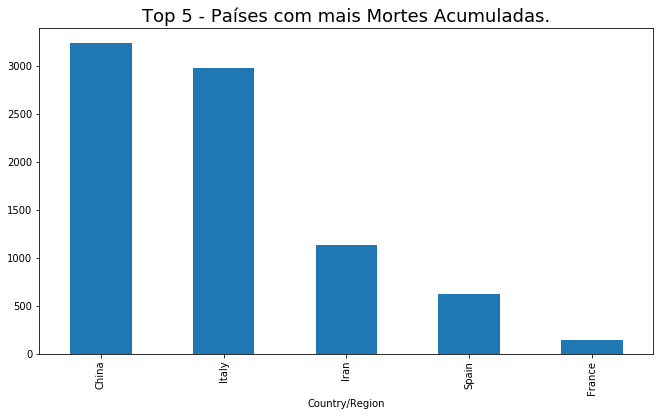

In [40]:
mortes_confirmadas.groupby('Country/Region')[data_atual_mortes].sum().sort_values(ascending=False).head().plot(kind='bar')
plt.title('Top 5 - Países com mais Mortes Acumuladas.', fontsize=18)
plt.show()

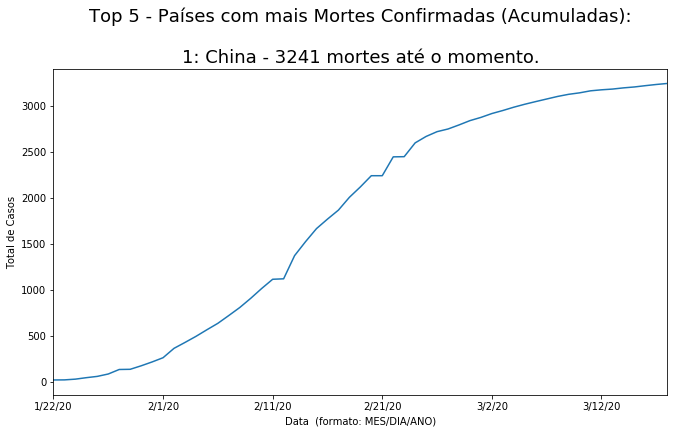

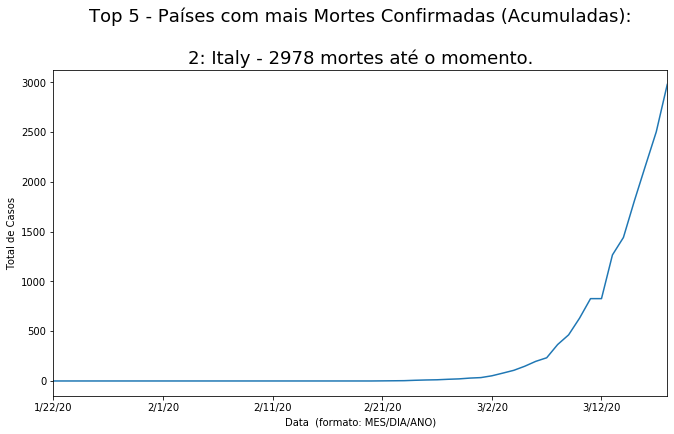

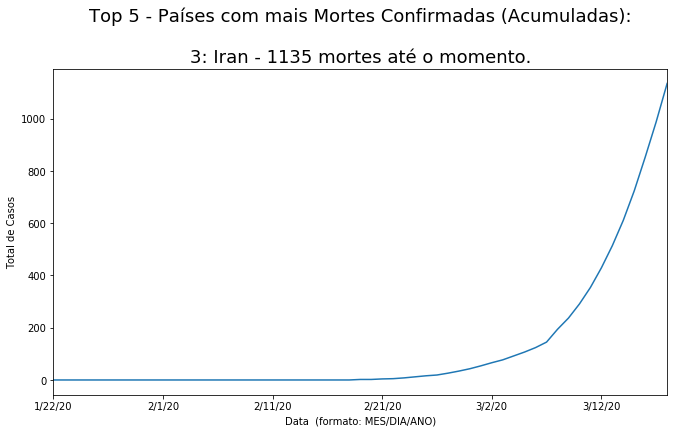

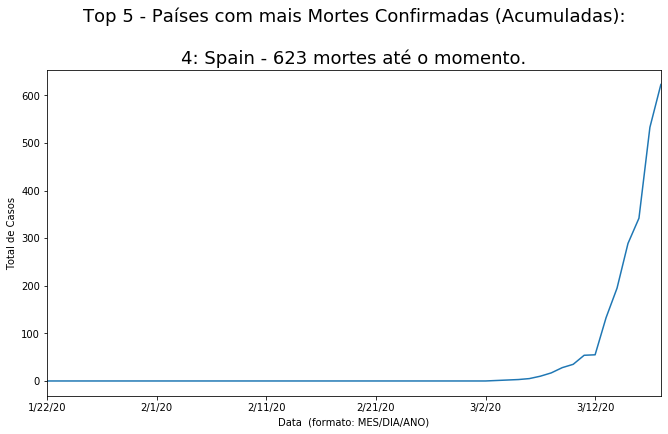

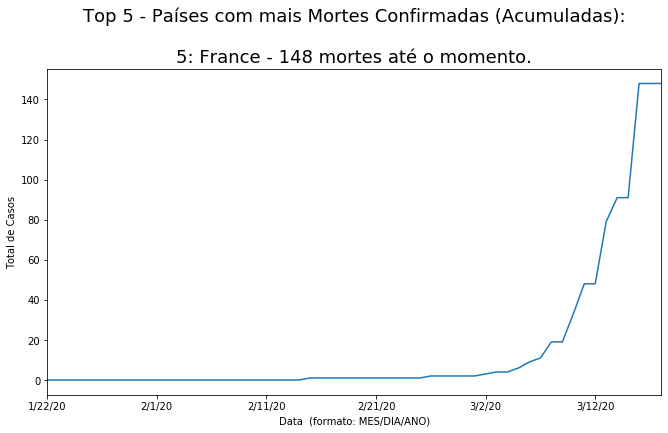

In [41]:
# Plota os graficos de cada país no top 10
for posicao, i in enumerate(top5_mortes):
    total = mortes_confirmadas.groupby('Country/Region')[data_atual_mortes].sum().loc[i]
    plot_total_casos_pais(mortes_confirmadas,
                          i,
                          'Top 5 - Países com mais Mortes Confirmadas (Acumuladas):\n\n' 
                          + str(posicao+1) 
                          + ': ' + str(i)
                          + ' - ' + str(total) + ' mortes até o momento.',
                          data_final=data_atual_confirmados)


## Distribuição das mortes ao longo do tempo.

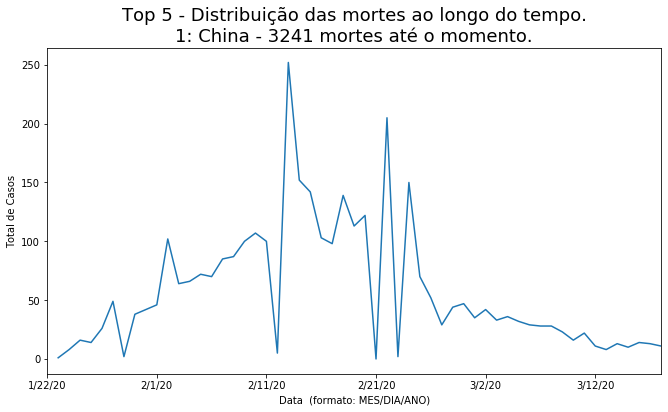

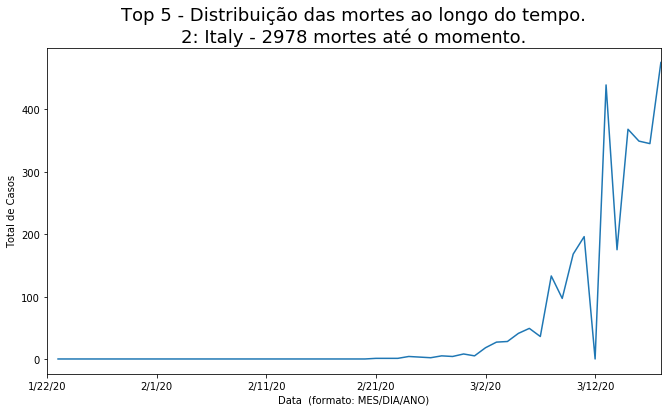

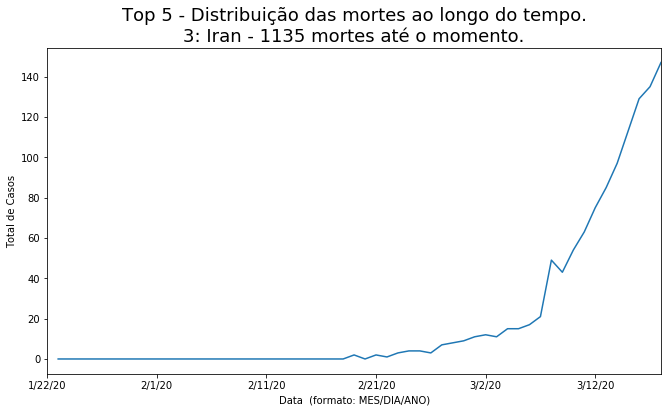

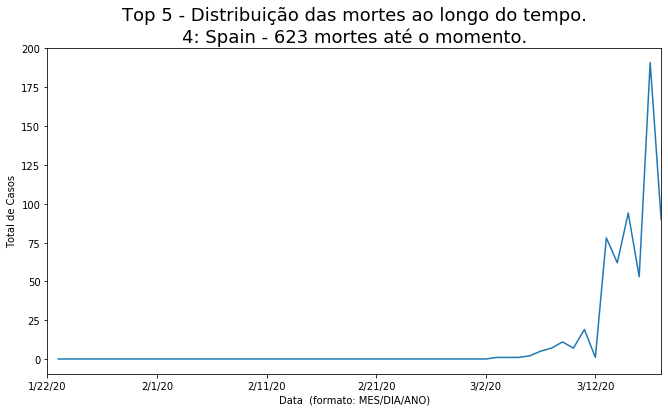

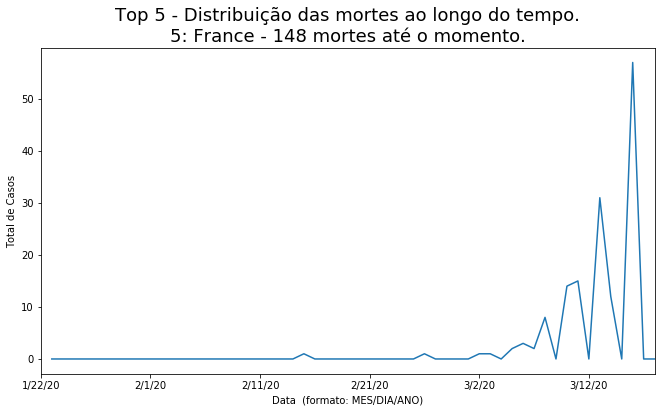

In [42]:
# Plota os graficos de cada país no top 5
for posicao, i in enumerate(top5_mortes):
    total = mortes_confirmadas.groupby('Country/Region')[data_atual_mortes].sum().loc[i]
    plot_novos_casos_pais(mortes_confirmadas,
                          i,
                          'Top 5 - Distribuição das mortes ao longo do tempo.\n' 
                          + str(posicao+1) 
                          + ': ' + str(i)
                          + ' - ' + str(total) + ' mortes até o momento.',
                          data_final=data_atual_mortes)


## Análise dos Casos Recuperados

## Top 5 - Países com mais casos recuperados

In [43]:
top5_recuperados = casos_recuperados.groupby('Country/Region')[data_atual_recuperados].sum().sort_values(ascending=False)[:5].index

print('Total de Casos Recuperados:\n\n',casos_recuperados.groupby('Country/Region')[data_atual_recuperados].sum().sort_values(ascending=False).head())

Total de Casos Recuperados:

 Country/Region
China           69755
Iran             5389
Italy            4025
Korea, South     1540
Spain            1081
Name: 3/18/20, dtype: int64


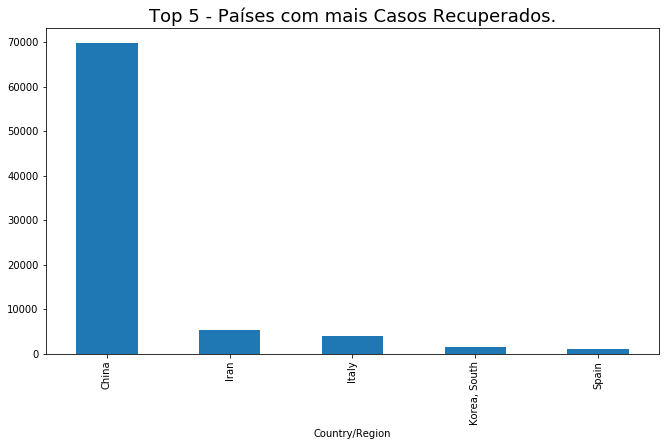

In [44]:
casos_recuperados.groupby('Country/Region')[data_atual_recuperados].sum().sort_values(ascending=False).head().plot(kind='bar')
plt.title('Top 5 - Países com mais Casos Recuperados.', fontsize=18)
plt.show()

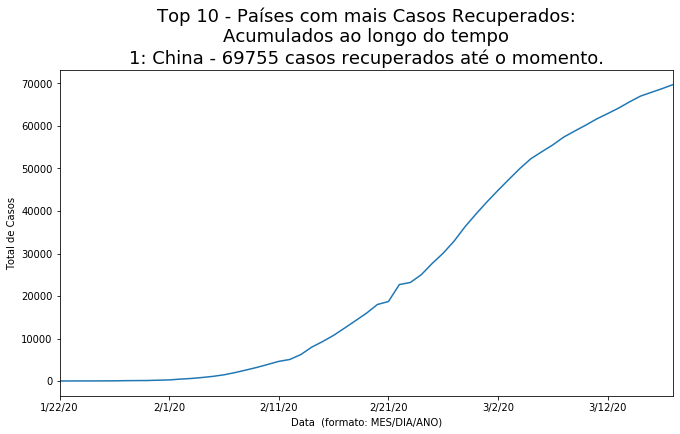

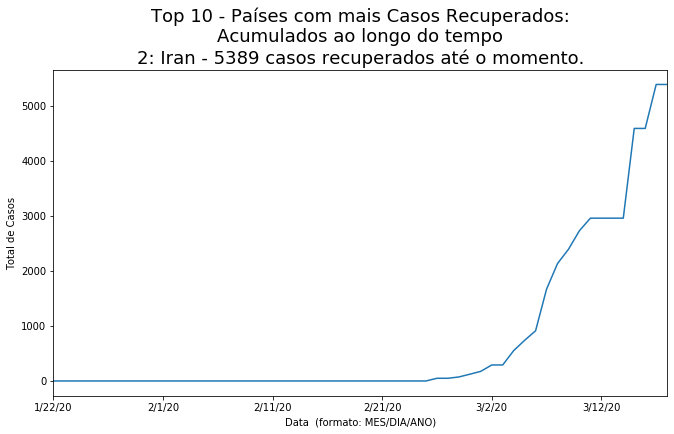

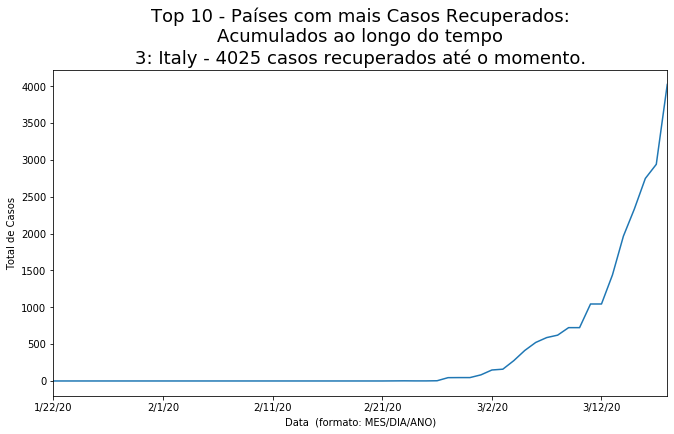

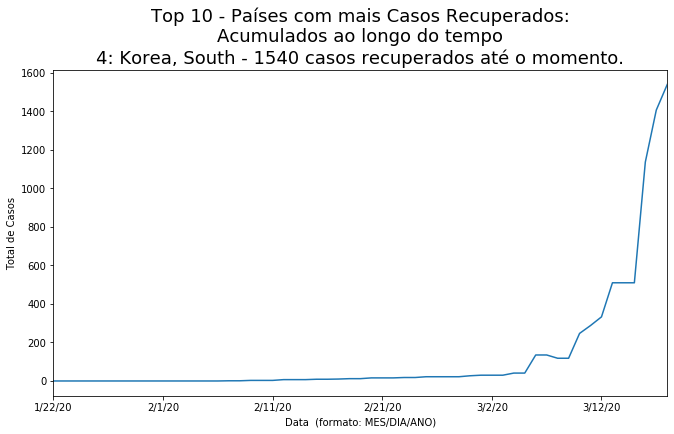

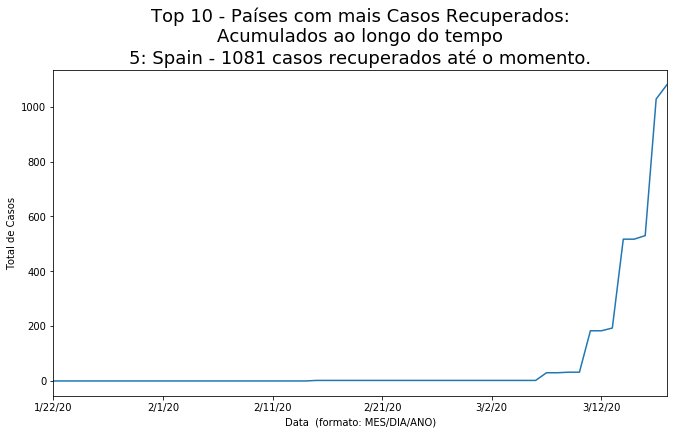

In [45]:
# Plota os graficos de cada país no top 10
for posicao, i in enumerate(top5_recuperados):
    total = casos_recuperados.groupby('Country/Region')[data_atual_recuperados].sum().loc[i]
    plot_total_casos_pais(casos_recuperados,
                          i,
                          'Top 10 - Países com mais Casos Recuperados:\nAcumulados ao longo do tempo\n' 
                          + str(posicao+1) 
                          + ': ' + str(i)
                          + ' - ' + str(total) + ' casos recuperados até o momento.',
                          data_final=data_atual_recuperados)


## Distribuição dos Casos Curados ao longo do tempo.

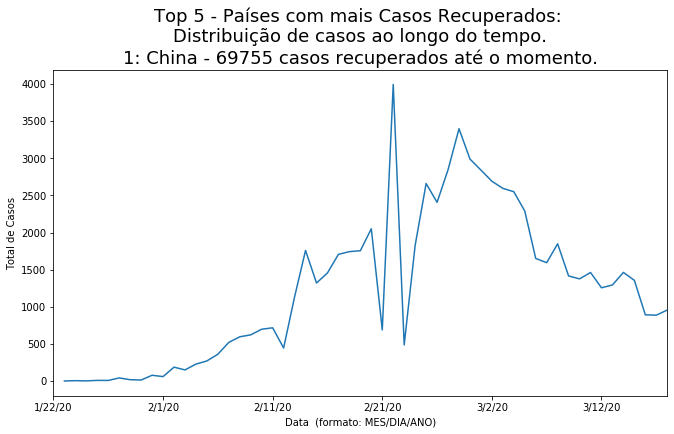

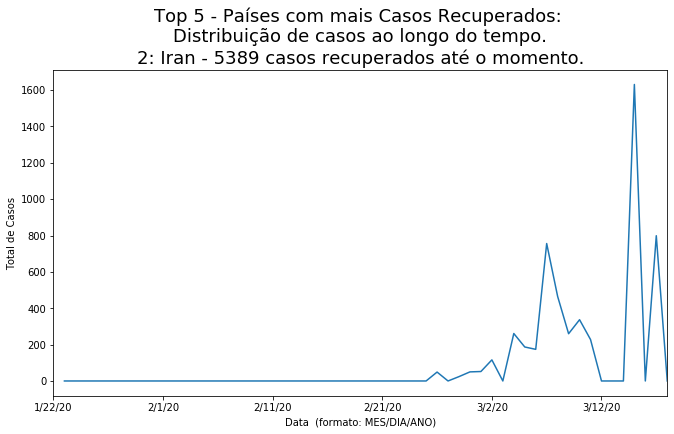

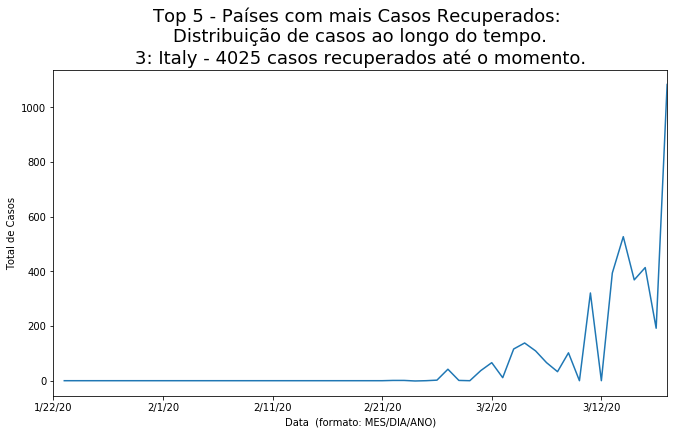

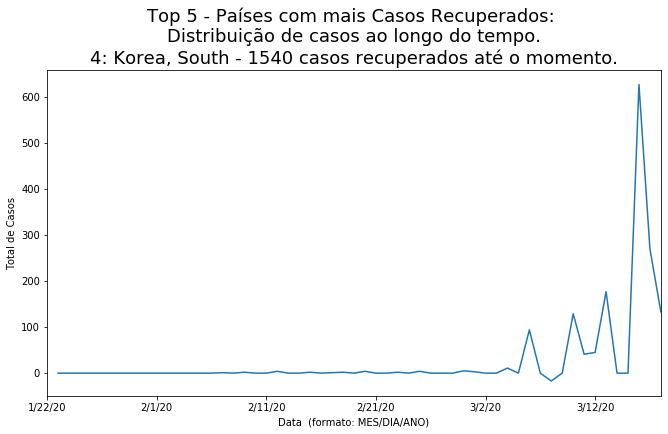

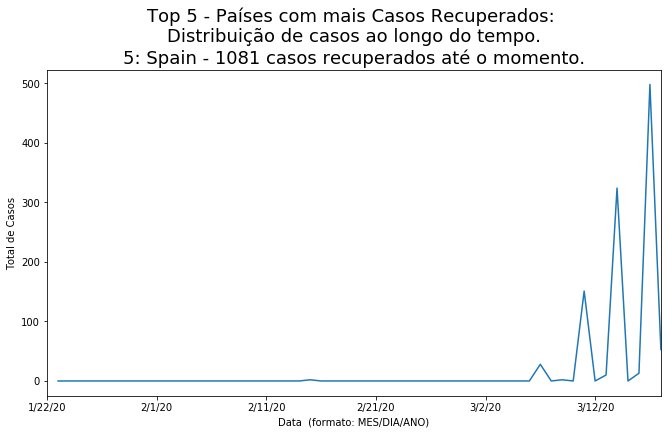

In [46]:
# Plota os graficos de cada país no top 5
for posicao, i in enumerate(top5_recuperados):
    total = casos_recuperados.groupby('Country/Region')[data_atual_recuperados].sum().loc[i]
    plot_novos_casos_pais(casos_recuperados,
                          i,
                          'Top 5 - Países com mais Casos Recuperados: \nDistribuição de casos ao longo do tempo.\n' 
                          + str(posicao+1) 
                          + ': ' + str(i)
                          + ' - ' + str(total) + ' casos recuperados até o momento.',
                          data_final=data_atual_recuperados)


# Taxa de Letalidade e de recuperação

  Uma das métricas que pode nos dizer sobre o grau de gravidade de uma doença é sua taxa de letalidade, que é a proporção entre o número total de mortes e o total de casos.


**Fórmula:**


***Total de mortes / Total de casos confirmados***


In [47]:
# Cria o dataframe
casos = pd.concat([
    casos_confirmados.groupby('Country/Region').sum().iloc[:,-1],
    mortes_confirmadas.groupby('Country/Region').sum().iloc[:,-1],
    casos_recuperados.groupby('Country/Region').sum().iloc[:,-1]
], axis=1)

casos.columns = ['confirmados', 'mortes', 'recuperados']

casos.head()

,confirmados,mortes,recuperados
Country/Region,,,
Afghanistan,22,0,1
Albania,59,2,0
Algeria,74,7,12
Andorra,39,0,1
Antigua and Barbuda,1,0,0


In [48]:
# taxa de letalidade dos paises com mais casos
casos['taxa_letalidade'] = casos['mortes'] / casos['confirmados']  * 100
casos.sort_values('confirmados', ascending=False)[:10]

,confirmados,mortes,recuperados,taxa_letalidade
Country/Region,,,,
China,81102,3241,69755,3.996202
Italy,35713,2978,4025,8.338700
Iran,17361,1135,5389,6.537642
Spain,13910,623,1081,4.478792
Germany,12327,28,105,0.227144
France,9105,148,12,1.625481
"Korea, South",8413,84,1540,0.998455
US,7783,118,0,1.516125
Switzerland,3028,28,15,0.924703


In [49]:
# taxa de recuperação dos paises com mais casos
casos['taxa_recuperacao'] = casos['recuperados'] / casos['confirmados'] * 100
casos.sort_values('confirmados', ascending=False)[:10]

,confirmados,mortes,recuperados,taxa_letalidade,taxa_recuperacao
Country/Region,,,,,
China,81102,3241,69755,3.996202,86.008976
Italy,35713,2978,4025,8.338700,11.270406
Iran,17361,1135,5389,6.537642,31.040839
Spain,13910,623,1081,4.478792,7.771387
Germany,12327,28,105,0.227144,0.851789
France,9105,148,12,1.625481,0.131796
"Korea, South",8413,84,1540,0.998455,18.305004
US,7783,118,0,1.516125,0.000000
Switzerland,3028,28,15,0.924703,0.495376


In [50]:
casos.describe()

,confirmados,mortes,recuperados,taxa_letalidade,taxa_recuperacao
count,152.000000,152.000000,152.000000,152.000000,152.000000
mean,1413.881579,57.453947,547.414474,1.716318,5.369913
std,7478.892306,369.380506,5678.570003,4.978411,13.071646
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.750000,0.000000,0.000000,0.000000,0.000000
50%,49.500000,0.000000,1.000000,0.000000,0.114489
75%,229.750000,2.000000,5.000000,1.082951,3.860425
max,81102.000000,3241.000000,69755.000000,50.000000,100.000000


  Com o resumo estatístico dos dados podemos ver alguns pontos sobre a distribuição dos dados, como a diferença dos primeiros colocados no rank de mais casos, o que pode influênciar ou dificultar as análises dos casos.


  Para evitar o impacto disso e facilitar as visualizações, os dados serão divididos usando como referência seu 3° Quartil (valor que divide os dados em 2 grupos: 75% abaixo dele e 25% acima)

In [51]:
acima_q3 = casos[casos['confirmados'] > casos['confirmados'].quantile(0.75)]
q3 = casos[casos['confirmados'] <= casos['confirmados'].quantile(0.75)]
print('Quantidade de países no grupo acima do Terceiro Quartil:',acima_q3.shape[0])
print('Quantidade de países incluidos no grupo do Terceiro Quartil:',q3.shape[0])

Quantidade de países no grupo acima do Terceiro Quartil: 38
Quantidade de países incluidos no grupo do Terceiro Quartil: 114


Text(0.5, 1.0, 'Grupo com mais casos Relatados.')

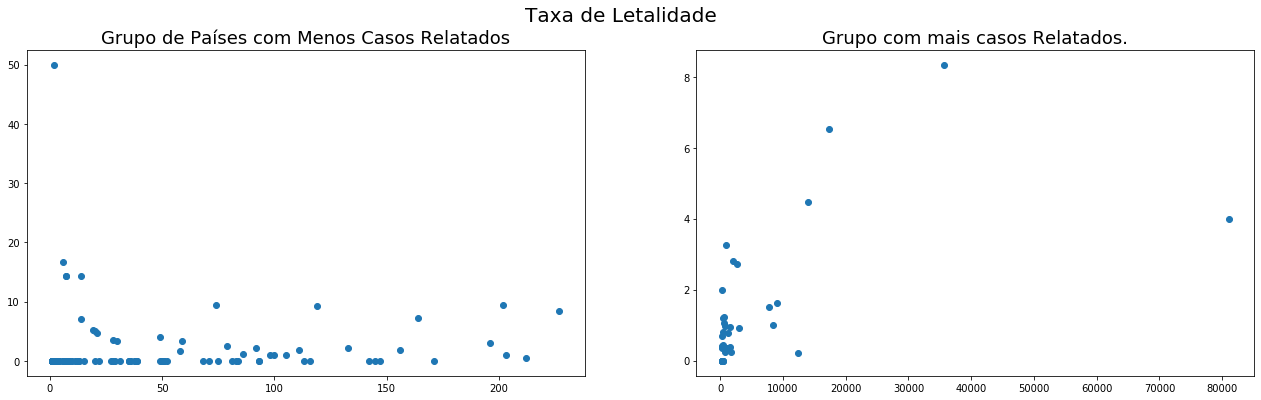

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22,6))
fig.suptitle('Taxa de Letalidade', fontsize=20)
ax1.scatter(x='confirmados', y='taxa_letalidade', data=q3)
ax1.set_title('Grupo de Países com Menos Casos Relatados', fontsize=18)
ax2.scatter(x='confirmados', y='taxa_letalidade', data=acima_q3)
ax2.set_title('Grupo com mais casos Relatados.', fontsize=18)

Text(0.5, 1.0, 'Grupo com mais casos Relatados.')

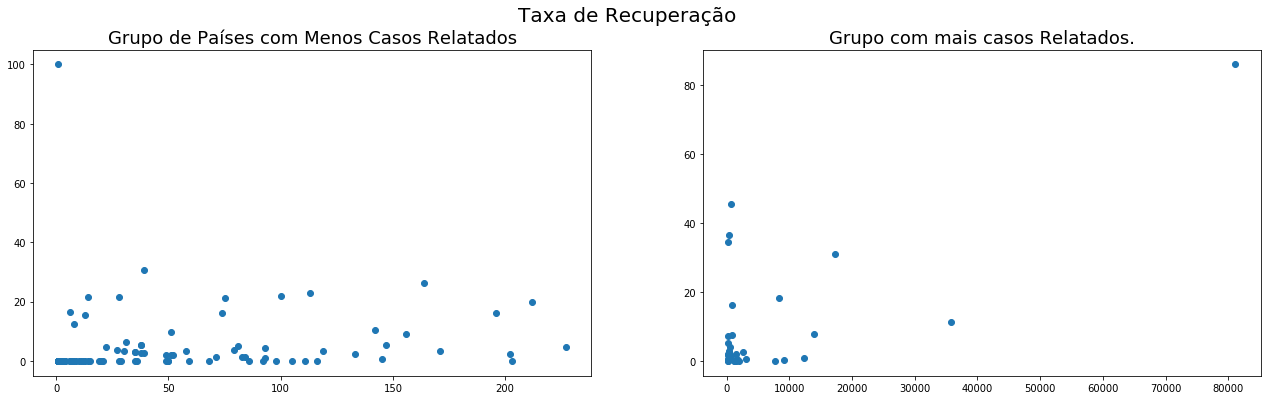

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22,6))
fig.suptitle('Taxa de Recuperação', fontsize=20)

ax1.scatter(x='confirmados', y='taxa_recuperacao', data=q3)
ax1.set_title('Grupo de Países com Menos Casos Relatados', fontsize=18)

ax2.scatter(x='confirmados', y='taxa_recuperacao', data=acima_q3)
ax2.set_title('Grupo com mais casos Relatados.', fontsize=18)

# E o Brasil?

In [132]:
ultimos_15_dias = pd.to_datetime(data_atual_confirmados) 
ultimos_15_dias = ultimos_15_dias - datetime.timedelta(days=15)
ultimos_15_dias = str(d.month) + '/' + str(d.day) + '/' + str(d.strftime('%y'))
print('Situação do Brasil:')
print(casos.loc['Brazil'].round(2))

Situação do Brasil:
confirmados         372.00
mortes                3.00
recuperados           2.00
taxa_letalidade       0.81
taxa_recuperacao      0.54
Name: Brazil, dtype: float64


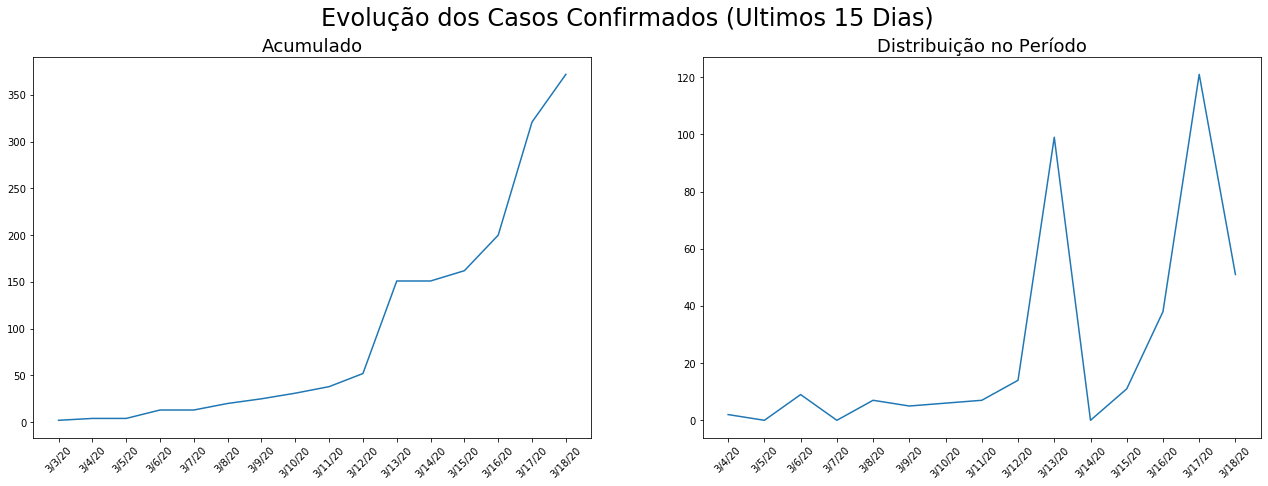

In [139]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22,7))
fig.suptitle('Evolução dos Casos Confirmados (Ultimos 15 Dias)', fontsize=24)
ax1.plot(casos_confirmados.groupby('Country/Region').sum().loc['Brazil'][2:][ultimos_15_dias:])
ax1.set_title('Acumulado', fontsize=18)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
ax2.plot(casos_confirmados.groupby('Country/Region').sum().loc['Brazil'][2:][ultimos_15_dias:].diff())
ax2.set_title('Distribuição no Período', fontsize=18)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
plt.show()

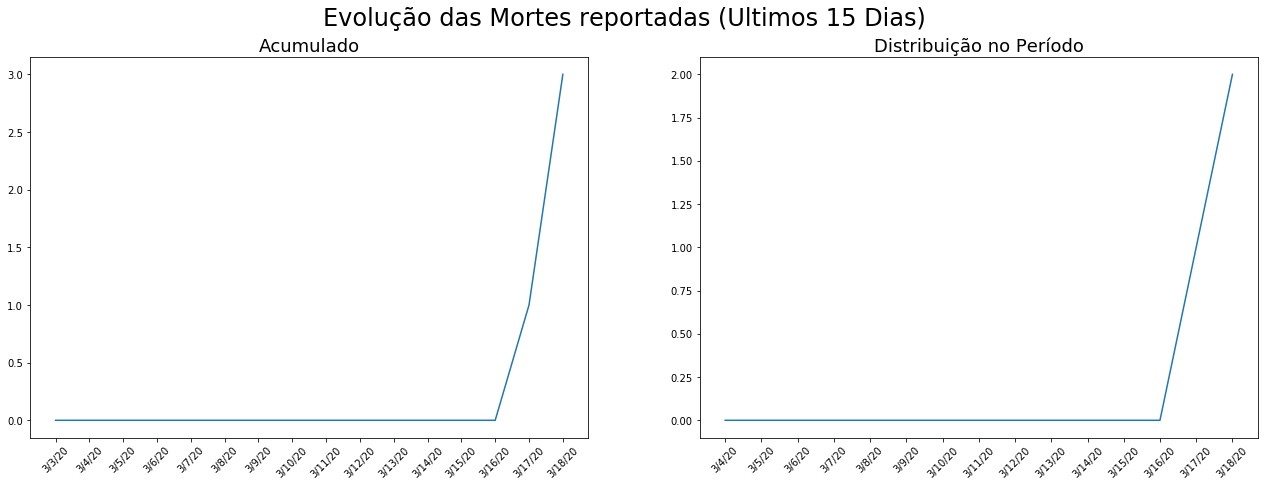

In [140]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22,7))
fig.suptitle('Evolução das Mortes reportadas (Ultimos 15 Dias)', fontsize=24)
ax1.plot(mortes_confirmadas.groupby('Country/Region').sum().loc['Brazil'][2:][ultimos_15_dias:])
ax1.set_title('Acumulado', fontsize=18)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
ax2.plot(mortes_confirmadas.groupby('Country/Region').sum().loc['Brazil'][2:][ultimos_15_dias:].diff())
ax2.set_title('Distribuição no Período', fontsize=18)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
plt.show()

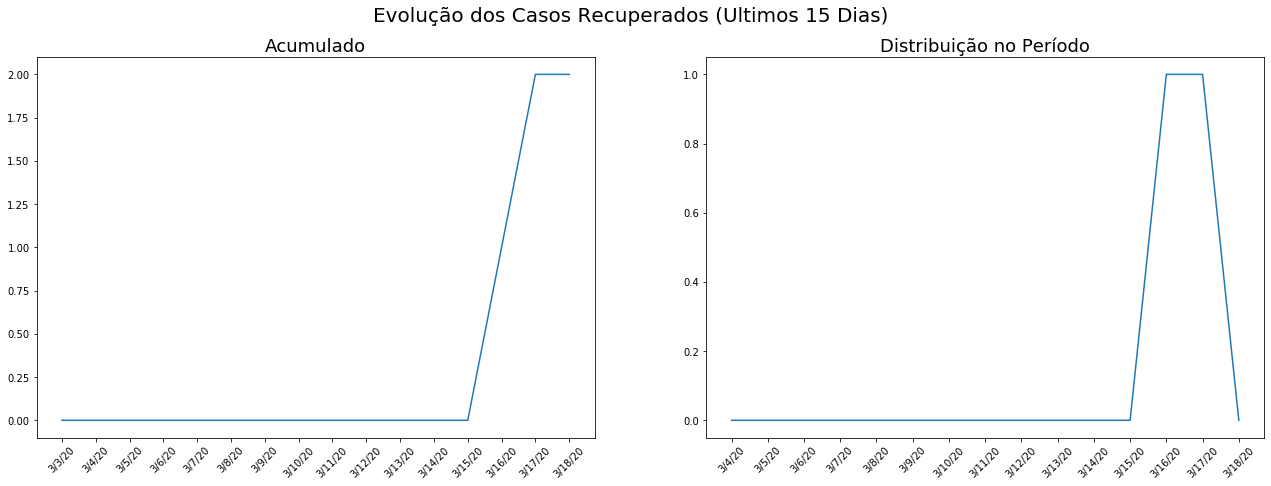

In [138]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22,7))
fig.suptitle('Evolução dos Casos Recuperados (Ultimos 15 Dias)', fontsize=20)
ax1.plot(casos_recuperados.groupby('Country/Region').sum().loc['Brazil'][2:][ultimos_15_dias:])
ax1.set_title('Acumulado', fontsize=18)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
ax2.plot(casos_recuperados.groupby('Country/Region').sum().loc['Brazil'][2:][ultimos_15_dias:].diff())
ax2.set_title('Distribuição no Período', fontsize=18)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
plt.show()